# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<b>Описание проекта</b>

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

<b>Инструкция по выполнению проекта</b>

- Откройте файл с данными и изучите его. 
    Путь к файлу: /datasets/users_behavior.csv.
- Разделите исходные данные на обучающую, валидационную и тестовую выборки.
- Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.
- Проверьте качество модели на тестовой выборке.
- Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

<b>Описание данных</b>

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

Импортируем необходимые инструменты.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

Откроем датафрейм и ознакомимся с данными

In [ ]:
df = pd.read_csv('/datasets/users_behavior.csv')
display(df.head())
df.info()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Убедимся, что в столбце *is_ultra* записаны только нули и единицы.

In [ ]:
df['is_ultra'].unique()

array([0, 1])

<b>Вывод.</b>

Данные подготовлены к работе.

## Разбейте данные на выборки

Разделим датафрейм, используя функцию *train_test_split* на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%).

Выведем результат на экран.

In [ ]:
df_80, df_test = train_test_split(df, test_size=.2, random_state=12345)
df_train, df_valid = train_test_split(df_80, test_size=.25, random_state=12345)
display(df_train.info())
display(df_test.info())
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2656 to 510
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
 4   is_ultra  1928 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1415 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2699 to 1806
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


<b>Вывод</b> 

Исходный датафрейм разбит на три выборки.

## Исследуйте модели

### Дерево решений

Запишем в обучающие признаки данные из обучающей выборки, исключив столбец *is_ultra*. В целевой признак внесём столбец *is_ultra* из обучающей выборки.

Создадим цикл, в котором переберём пять моделей деревьев с разной глубиной, обучим каждую на обучающей выборке, проверим результат обучения на валидационной выборке и выберем из них дерево с максимальной долей правильных ответов.

0.7651632970451011

3

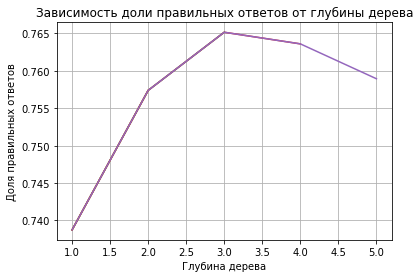

In [ ]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

best_result = 0
depth = 0
depths = []
results = []

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    depths.append(depth)
    results.append(result)
        
    plt.plot(depths, results)
    plt.title("Зависимость доли правильных ответов от глубины дерева")
    plt.xlabel("Глубина дерева")
    plt.ylabel("Доля правильных ответов")
    plt.grid()
    plt.show
            
    if result > best_result:
        best_depth = depth
        best_result = result

display(best_result, best_depth)

<b>Вывод</b>

Наибольшая доля правильных ответов наблюдается у дерева с глубиной 3 - 76.5%

### Случайный лес

Создадим цикл, в котором переберём модели случайного леса с количеством деревьев от 10 до 100 с шагом 10, обучим каждую на обучающей выборке, проверим результат обучения на валидационной выборке и выберем из них лес с максимальной долей правильных ответов.

In [ ]:
best_model = None
best_result = 0
for est in range(10, 101, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

display(best_result, best_est)

0.7993779160186625

80

<b>Вывод</b>

Лучший результат зафиксирован у 80-ти деревьев - 79.9%.

### Логистическая регрессия

Создадим модель логистической регрессии, обучим её на обучающей выборке, проверим на валидационной и выведем результат.

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(features_train, target_train)
predictions_valid = model_lr.predict(features_valid)
accuracy = model_lr.score(features_valid, target_valid)
accuracy

0.7262830482115086

<b>Вывод</b>

Доля правильных ответов в модели логистической регрессии - 72.6%

## Проверьте модель на тестовой выборке

Запишем в тестовые признаки данные из тестовой выборки, исключив столбец is_ultra. В целевой признак внесём столбец is_ultra из обучающей выборки.

In [ ]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

Проверка модели с наибольшей долей правильных ответов на тестовой выборке. Для более полного обучения модели объединим обучающую и валидационную выборки.

In [ ]:
features_train_80 = df_80.drop(['is_ultra'], axis=1)
target_train_80 = df_80['is_ultra']

model_forest = RandomForestClassifier(random_state=12345, n_estimators=80)
model_forest.fit(features_train_80, target_train_80)

predictions_test_forest = model_forest.predict(features_test)
accuracy_test_forest = accuracy_score(target_test, predictions_test_forest)
accuracy_test_forest

0.7713841368584758

<b>Вывод</b>

На тестовой выборке лучшая модель показала почти такой же результат, как на валидационной - доля правильных ответов 77.1%

## (бонус) Проверьте модели на адекватность

Посчитаем долю *is_ultra == True* в тестовой выборке

In [ ]:
df_test['is_ultra'].sum() / df_test['is_ultra'].count()

0.3048211508553655

Ввиду того, что целевой признак распределён неравномерно, воспользуемся *DummyClassifier*.
И посчитаем долю правильных ответов с параметром *strategy='most_frequent'*

In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_test)
dummy_clf.score(features_test, target_test)

0.6951788491446346

<b>Вывод</b>

Доля правильных ответов у выбранной модели выше, чем при случайном предсказании.

## Общий вывод

- В исследовании участвовали три различные алгоритма классификации: дерево решений, случайный лес и логистическая регрессия.
- Для проведения обучения, проверки моделей и тестирования лучшей модели исходный датафрейм был разделён на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%).
- При проверке модели на адекватность сделан вывод, что она показывает намного лучший результат, чем модель с примитивным прогнозом.
- По итогам исследования можно сделать заключение о том, что для получения рекомендации тарифных планов наиболее подходящей моделью является модель, построенная на случайном лесе с количеством деревьев 80 - доля правильных ответов в тестовой выборке составила 77.1%